# Explore here

In [1]:

import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

2024-04-12 21:47:40.057142: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 21:47:41.547081: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 21:47:45.288202: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 21:47:50.847870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os

# Print the current working directory
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /workspaces/eric_Image_Classifier/src


Directories found: ['train-cat', 'test-cat', 'test-dog', 'train-dog']


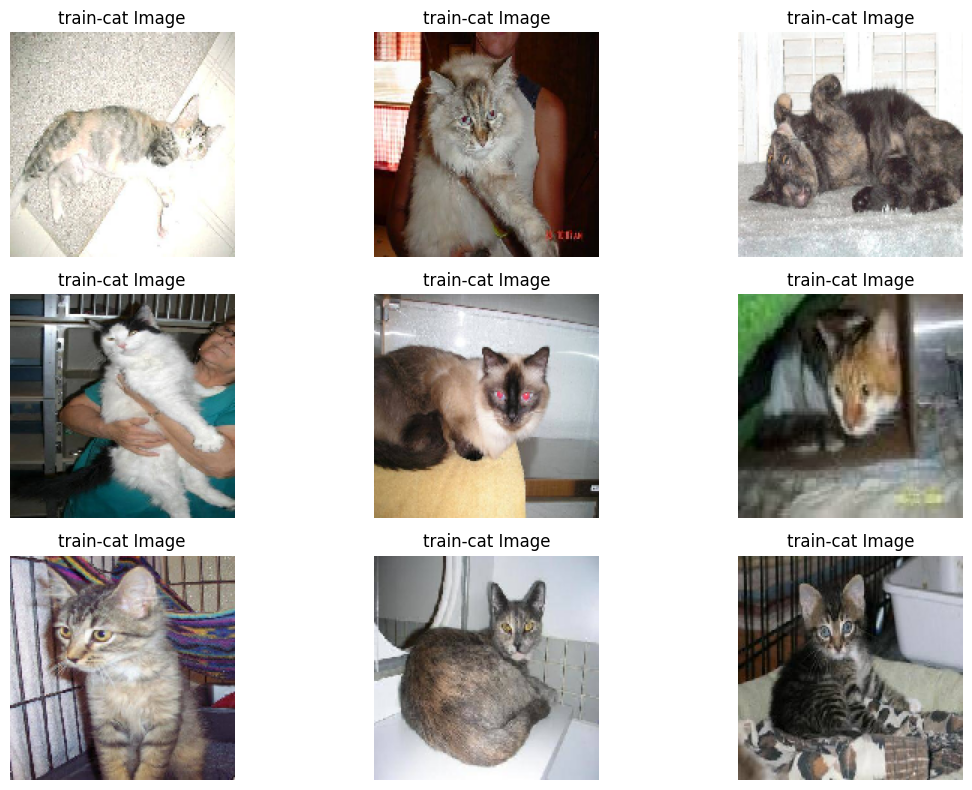

In [9]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Base directory for images
base_dir = '/workspaces/eric_Image_Classifier/data/raw/'

# Dynamically select a directory if unsure about the name
directories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
print("Directories found:", directories)

# Assuming the first directory is the one you want (adjust as needed)
selected_dir = directories[0] if directories else ""

if selected_dir:
    full_path = os.path.join(base_dir, selected_dir)
    image_files = os.listdir(full_path)

    # Load and display the first nine images
    plt.figure(figsize=(12, 8))
    for i, image_file in enumerate(image_files[:9]):
        img_path = os.path.join(full_path, image_file)
        img = load_img(img_path, target_size=(150, 150))
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{selected_dir} Image")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No directories found.")


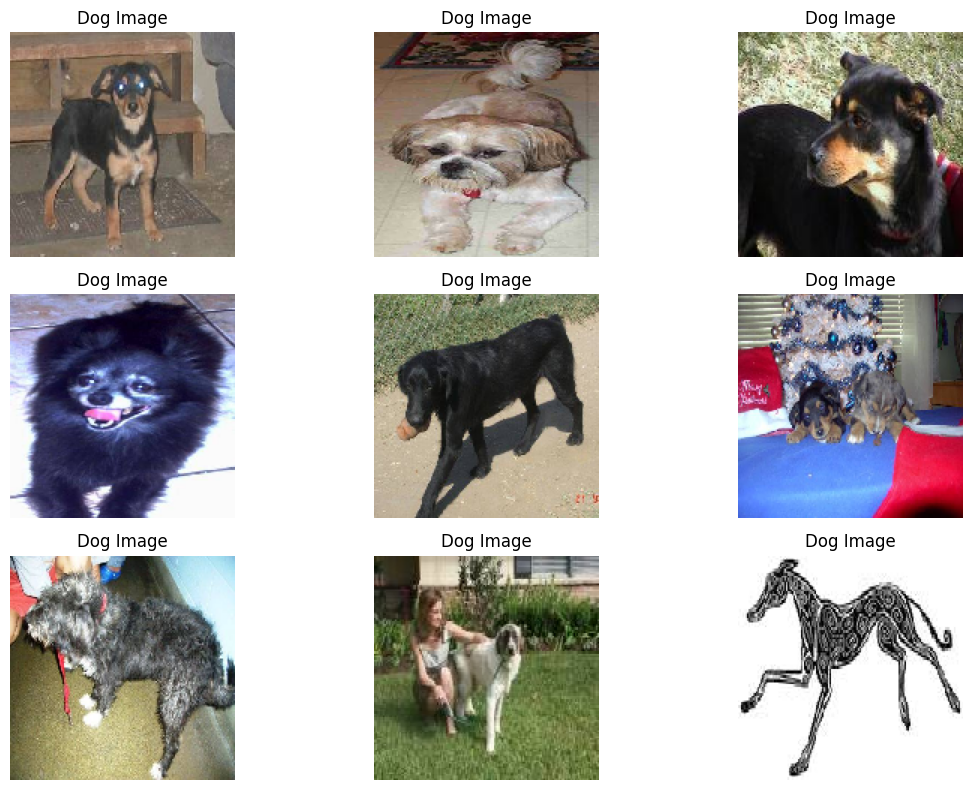

In [3]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Base directory for dog images in the training set
base_dir = '/workspaces/eric_Image_Classifier/data/raw/train-dog'

# Ensure the directory exists
if not os.path.exists(base_dir):
    print(f"Directory not found: {base_dir}")
else:
    # Get a list of dog image file names
    dog_image_files = os.listdir(base_dir)

    # Load the first nine dog images
    dog_images = []
    for i in range(min(9, len(dog_image_files))):  # Ensure you don't exceed the list length
        img_path = os.path.join(base_dir, dog_image_files[i])
        img = load_img(img_path, target_size=(150, 150))  # Adjust target_size as needed
        img_array = img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to [0, 1]
        dog_images.append(img_array)

    # Create a single figure to display all nine images
    plt.figure(figsize=(12, 8))

    for i in range(len(dog_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(dog_images[i])
        plt.title('Dog Image')
        plt.axis('off')

    # Adjust Layout
    plt.tight_layout()

    # Show the pictures
    plt.show()


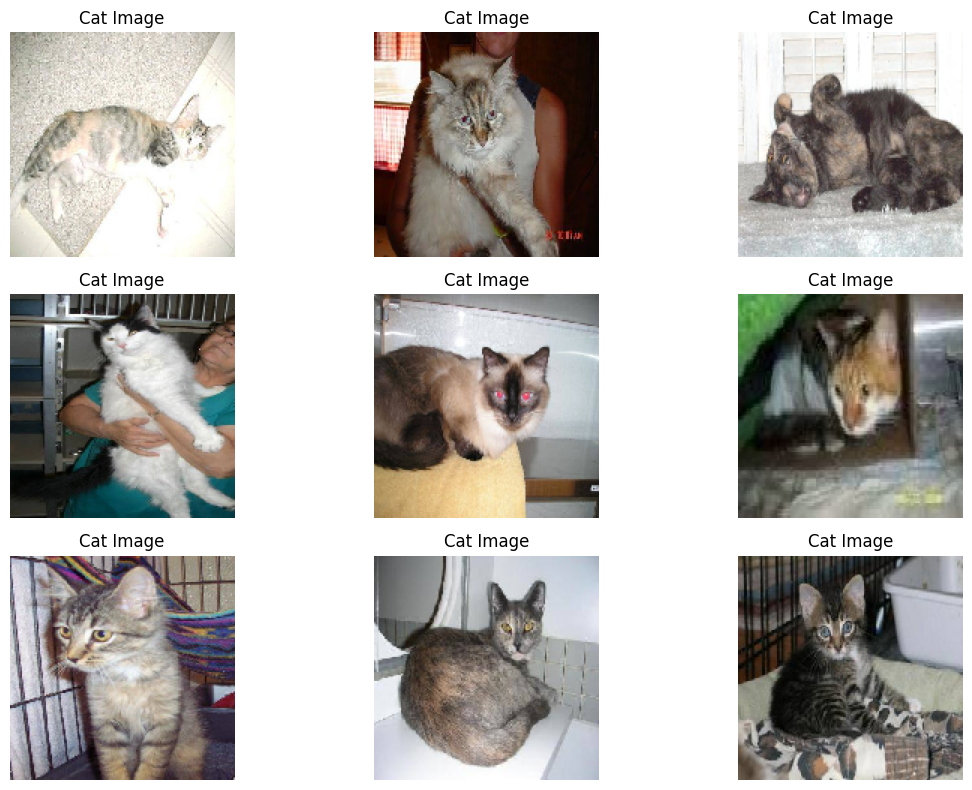

In [4]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Base directory for cat images in the training set
base_dir = '/workspaces/eric_Image_Classifier/data/raw/'

# Corrected subfolder path for cat images
cats_subfolder = os.path.join(base_dir, "train-cat")

# Ensure the directory exists
if not os.path.exists(cats_subfolder):
    print(f"Directory not found: {cats_subfolder}")
else:
    # Get a list of cat image file names
    cats_image_files = os.listdir(cats_subfolder)

    # Load the first nine cat images
    cats_images = []
    for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
        img_path = os.path.join(cats_subfolder, cats_image_files[i])
        img = load_img(img_path, target_size=(150, 150))  # Adjust target_size as needed
        img_array = img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to [0, 1]
        cats_images.append(img_array)

    # Create a single figure to display all cat images
    plt.figure(figsize=(12, 8))

    for i in range(len(cats_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cats_images[i])
        plt.title('Cat Image')
        plt.axis('off')

    # Adjust Layout
    plt.tight_layout()

    # Show the pictures
    plt.show()


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
image_size = (200, 200)
batch_size = 16

# Adding rescaling to normalize the images
datagentrain = ImageDataGenerator(rescale=1./255)
datagentest = ImageDataGenerator(rescale=1./255)

# Base directory for training data
train_dir = '/workspaces/eric_Image_Classifier/data/raw/'

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["train-dog", "train-cat"],
)

# Base directory for test data
test_dir = '/workspaces/eric_Image_Classifier/data/raw'  # Adjusted to be an absolute path

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["test-dog", "test-cat"],
)


Found 111 images belonging to 2 classes.


Found 34 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    # Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    # Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    # Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    # Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    # Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    # Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    # Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    # Dense(units=4096, activation="relu"),
    # Dense(units=4096, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [12]:
from tensorflow import keras
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])


In [13]:
# Train the model
history = model.fit(
    train_data,
    epochs=2,
    verbose=1
)

Epoch 1/2


/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-12 22:04:02.141658: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2024-04-12 22:04:02.828383: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2024-04-12 22:04:04.128313: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.
2024-04-12 22:04:04.210044: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 163840000 exceeds 10% of free system memory.
2024-04-12 22:04:05.346886: 

4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 11s/step - accuracy: 0.5165 - loss: 0.8027
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.5226 - loss: 0.6929


In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Update the file extension from .h5 to .keras
checkpoint = ModelCheckpoint(
    "../models/vgg16_1.keras",  # Changed the file extension to .keras
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto"
)

early = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    verbose=1,
    mode="auto"
)

# Continue with your training process
hist = model.fit(
    train_data,
    steps_per_epoch=100,
    validation_data=test_data,
    validation_steps=10,
    epochs=3,
    callbacks=[checkpoint, early]
)


Epoch 1/3
  4/100 ━━━━━━━━━━━━━━━━━━━━ 16:29 10s/step - accuracy: 0.3986 - loss: 0.6954

2024-04-12 22:12:17.856648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_accuracy improved from -inf to 0.70588, saving model to ../models/vgg16_1.keras


2024-04-12 22:12:22.356901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 361ms/step - accuracy: 0.4224 - loss: 0.6948 - val_accuracy: 0.7059 - val_loss: 0.6927
Epoch 2/3
  4/100 ━━━━━━━━━━━━━━━━━━━━ 19:30 12s/step - accuracy: 0.4565 - loss: 0.6931

2024-04-12 22:13:05.750773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_accuracy did not improve from 0.70588
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 414ms/step - accuracy: 0.4680 - loss: 0.6932 - val_accuracy: 0.4412 - val_loss: 0.6931
Epoch 3/3


2024-04-12 22:13:10.162262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  4/100 ━━━━━━━━━━━━━━━━━━━━ 16:19 10s/step - accuracy: 0.5050 - loss: 0.6929

2024-04-12 22:14:26.623329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 3: val_accuracy did not improve from 0.70588
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 351ms/step - accuracy: 0.5045 - loss: 0.6929 - val_accuracy: 0.4412 - val_loss: 0.6933


2024-04-12 22:14:30.802818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


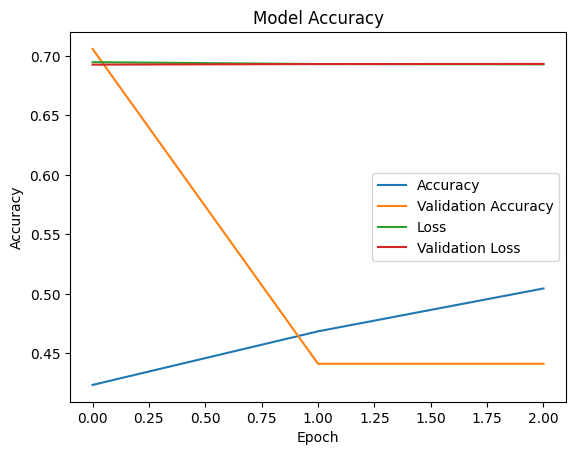

In [17]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()
